# Redução de dimensionalidade de Imagens da base MNIST com Autoencoder

Uso de Autoencoders para redução de dimensionalidade das imagens da base MNIST.

## Importação e Preprocessamento

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense

Using TensorFlow backend.


In [2]:
(treinamento, _) , (teste,_) = mnist.load_data()

In [3]:
treinamento.shape

(60000, 28, 28)

In [4]:
teste.shape

(10000, 28, 28)

In [5]:
base_treinamento = treinamento.astype('float32')/255
base_teste = teste.astype('float32')/255

In [6]:
base_treinamento = base_treinamento.reshape(base_treinamento.shape[0],
                                           np.prod(base_treinamento.shape[1:]))


In [10]:
base_teste = base_teste.reshape(base_teste.shape[0],
                                np.prod(base_teste.shape[1:]))

## Criação e Treinamento do Autoencoder

In [12]:
# Arquitetura do Autoencoder é  784 input - 32 hidden e 784 saida
fator_compactacao = 784/32

In [13]:
autoencoder = Sequential()

In [14]:
#Primeira Camada oculta
autoencoder.add(Dense(units=32, activation='relu', input_dim=784))
#Camada de Saida
autoencoder.add(Dense(units=784, activation='sigmoid'))

In [15]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [16]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', 
                    metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
autoencoder.fit(base_treinamento, base_treinamento,
                epochs=50, batch_size=256, validation_data=(base_teste,base_teste))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 4s 67us/step - loss: 0.2791 - acc: 0.7837 - val_loss: 0.1910 - val_acc: 0.7993
Epoch 2/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1716 - acc: 0.8027 - val_loss: 0.1539 - val_acc: 0.8051
Epoch 3/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1445 - acc: 0.8073 - val_loss: 0.1337 - val_acc: 0.8082
Epoch 4/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.1284 - acc: 0.8098 - val_loss: 0.1210 - val_acc: 0.8100
Epoch 5/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.1182 - acc: 0.8113 - val_loss: 0.1130 - val_acc: 0.8112
Epoch 6/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.1112 - acc: 0.8122 - val_loss: 0.1070 - val_acc: 0.8118
Ep

60000/60000 [==============================] - 2s 38us/step - loss: 0.0926 - acc: 0.8142 - val_loss: 0.0914 - val_acc: 0.8133
Epoch 46/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.0926 - acc: 0.8142 - val_loss: 0.0915 - val_acc: 0.8134
Epoch 47/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.0926 - acc: 0.8142 - val_loss: 0.0915 - val_acc: 0.8133
Epoch 48/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0926 - acc: 0.8142 - val_loss: 0.0915 - val_acc: 0.8133
Epoch 49/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.0926 - acc: 0.8142 - val_loss: 0.0915 - val_acc: 0.8133
Epoch 50/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.0926 - acc: 0.8142 - val_loss: 0.0915 - val_acc: 0.8133


## Validação e Resultados

In [18]:
dimensao_original = Input(shape=(784,))

In [19]:
camada_encoder = autoencoder.layers[0]

In [20]:
encoder = Model(inputs=dimensao_original,outputs=camada_encoder(dimensao_original))

In [21]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [22]:
imagens_codificadas = encoder.predict(base_teste)

In [23]:
imagens_decodificadas = autoencoder.predict(base_teste)

In [25]:
imagens_teste = np.random.randint(base_teste.shape[0], size = 10)

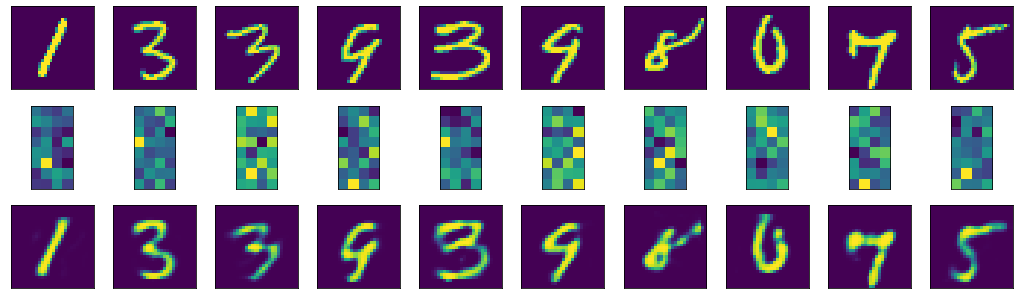

In [26]:
plt.figure(figsize=(18,18))
for i,indice in enumerate(imagens_teste):
    #Imagens Originais
    eixo = plt.subplot(10,10, i+1)
    plt.imshow(base_teste[indice].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
    #Imagens codificadas
    eixo = plt.subplot(10,10, i+1+10)
    plt.imshow(imagens_codificadas[indice].reshape(8,4))
    plt.xticks(())
    plt.yticks(())
    #Imagens Decodificadas
    eixo = plt.subplot(10,10, i+1+20)
    plt.imshow(imagens_decodificadas[indice].reshape(28,28))
    plt.xticks(())
    plt.yticks(())